In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
churn = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv")

## Univariant Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


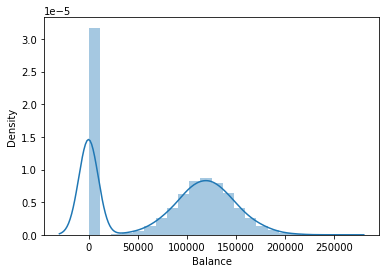

In [6]:
sns.distplot(churn['Balance'], kde=True)

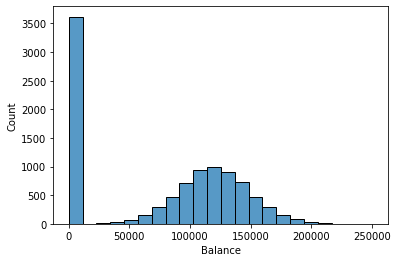

In [7]:
sns.histplot(churn['Balance'])

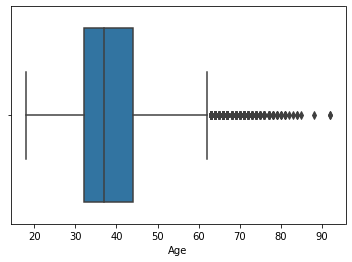

In [8]:
sns.boxplot(x=churn['Age'])

## Bivariate Analysis

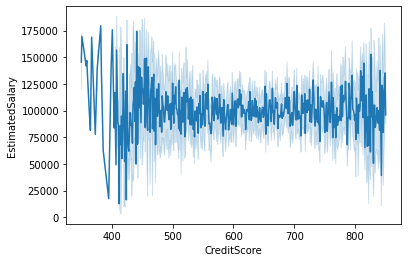

In [9]:
sns.lineplot(data = churn , x='CreditScore', y='EstimatedSalary')

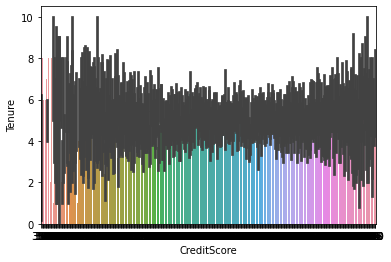

In [10]:
sns.barplot(data=churn, x="CreditScore", y="Tenure")

In [ ]:
plt.figure(figsize=(50,50))
sns.barplot(data = churn, x= 'Age', y='Balance')

In [ ]:
sns.scatterplot(data = churn, x = 'Age', y = 'Balance')

# Multi variate analysis

In [ ]:
sns.scatterplot(data = churn, x = 'Age', y = 'Balance', hue = "Gender")

In [ ]:
sns.pairplot(data = churn)

## Descriptive Statistics

In [ ]:
churn.mean(numeric_only = True)

In [ ]:
churn.median(numeric_only = True)

In [ ]:
churn['Age'].mode()

In [ ]:
churn.var(numeric_only = True)

In [ ]:
churn.std(numeric_only = True)

In [ ]:
churn.describe()

In [ ]:
churn['Age'].unique()

In [ ]:
churn['Age'].value_counts()

## Handling Empty Values

In [ ]:
churn.isnull().any()

In [ ]:
churn.isnull().sum()

## Outliers

In [ ]:
sns.boxplot(x=churn['CreditScore'])

In [ ]:
q  = churn.quantile([0.75,0.25], numeric_only = True)
q

In [ ]:
iqr =  q.iloc[0] - q.iloc[1]
iqr

In [ ]:
u = q.iloc[0] + (1.5*iqr)
u

In [ ]:
l = q.iloc[1] - (1.5*iqr)
l

In [ ]:
churn['CreditScore'] = np.where(np.logical_or(churn['CreditScore'] > 900, churn['CreditScore'] < 383), 652, churn['CreditScore'])

In [ ]:
sns.boxplot(x=churn['CreditScore'])

# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
oneh = OneHotEncoder()

In [ ]:
churn['Gender'] = le.fit_transform(churn['Gender'])
churn['Surname'] = le.fit_transform(churn['Surname'])
churn['Geography'] = le.fit_transform(churn['Geography'])
churn

# Split into x and y

In [ ]:
x = churn.iloc[:, 3:13]
x

In [ ]:
y = churn['Exited']
y

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

# Train Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)


x_train

In [ ]:
x_train.shape

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
y_test